In [1]:
# TensorFlow와 Keras 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
# MNIST 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리 (0-255 범위를 0-1 범위로 변환)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# 간단한 신경망 모델 만들기
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # 28x28 이미지를 1차원 배열로 변환
    layers.Dense(128, activation='relu'), # 은닉층
    layers.Dense(10, activation='softmax') # 출력층 (0-9 숫자 분류)
])

C:\Users\08shw\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=5)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.8730 - loss: 0.4388
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9641 - loss: 0.1219
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9760 - loss: 0.0793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9827 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.9862 - loss: 0.0424
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.9690 - loss: 0.0995



테스트 정확도: 0.9750000238418579
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step


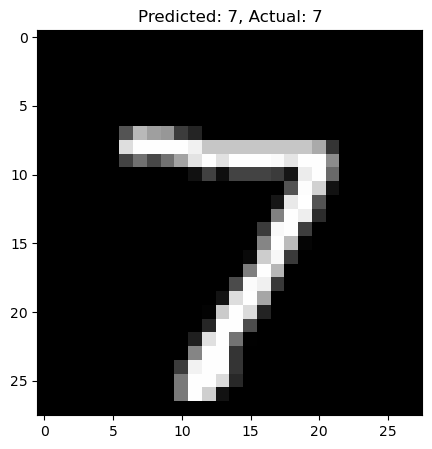

In [5]:
print(f'\n테스트 정확도: {test_acc}')

# 예측한 결과 시각화
predictions = model.predict(x_test)

# 첫 번째 이미지 출력 및 예측 결과
plt.figure(figsize=(5,5))
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicted: {predictions[0].argmax()}, Actual: {y_test[0]}')
plt.show()